## Week 9 Demo: Machine Learning
#### This demo is adapted from D8.

First, let's import packages we need:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
import logging
import matplotlib
matplotlib.set_loglevel("error")  # or "critical"
import warnings
warnings.filterwarnings("ignore")

Here's our data:

In [2]:
breweries = pd.read_csv('https://raw.githubusercontent.com/COGS108/D8-Data/refs/heads/main/breweries.csv')
beers = pd.read_csv('https://raw.githubusercontent.com/COGS108/D8-Data/refs/heads/main/beers.csv')

We're going to try to predict the `style` of beer from its alcohol by volume (`abv`) and its international bitterness unites (`ibu`). To do this, first we will need to **remove any beers from our `beers` dataset where data are missing for any of these three values. Store this back into the `beers` dataset.** 

In [3]:
beers = beers.dropna(subset=['style','abv','ibu'])
beers.isnull().sum(axis = 0)

Unnamed: 0    0
abv           0
ibu           0
id            0
name          0
style         0
brewery_id    0
ounces        0
dtype: int64

Using the `beers` dataset you've now got, **merge `beers` and `breweries` together using a left join. Assign this to the variable `beer_df`. Be sure to look at the first few rows of `beer_df`.**

We can merge the datasets using `pd.merge()`.

In [4]:
# Merge the "beers" and "breweries" DataFrames using a left join and store the result in "beer_df."
beer_df = pd.merge(beers, breweries, how="left")

# Display the first few rows of the merged DataFrame "beer_df" to inspect the result.
beer_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces,city,state
0,14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,NaN,NaN
1,21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,NaN,NaN
2,22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,NaN,NaN
3,24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,NaN,NaN
4,25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,NaN,NaN


Then let's see how many different styles of beer we have:

In [5]:
beer_counts = beer_df['style'].value_counts()

print(beer_counts)

style
American IPA                          301
American Pale Ale (APA)               153
American Amber / Red Ale               77
American Double / Imperial IPA         75
American Blonde Ale                    61
                                     ... 
Roggenbier                              1
Smoked Beer                             1
Euro Pale Lager                         1
Other                                   1
American Double / Imperial Pilsner      1
Name: count, Length: 90, dtype: int64


For this lab, let's just try to predict the four most common `style`s of beer. **Filter the `beer_df` dataset to only include entries from the four most common `style`s of beer.** Store this filtered dataset into `beer_df`.

In [6]:
# Calculate the count of each unique value in the 'style' column of the DataFrame "beer_df" 
# and select the top four most common styles. The result is a list of these top styles.
styles = beer_df['style'].value_counts()[:4].index.tolist()

# Filter the DataFrame "beer_df" to keep only the rows where the 'style' column contains
# one of the top four styles determined in the previous step.
beer_df = beer_df[beer_df['style'].isin(styles)]

Now we are ready to build a machine learning model.

We'll begin by creating our **predictor** and **target** variables:

- `beer_X`: should contain only the predictor columns — specifically `abv` (alcohol by volume) and `ibu` (international bitterness units).
- `beer_Y`: should contain the `style` column — this is the target variable we are trying to predict.

Then, use `train_test_split()` from `sklearn.model_selection` to split the data into training and testing sets, using an 80/20 split.

In [7]:
# Define predictors (X) and target (Y)
beer_X = beer_df[["abv", "ibu"]]  # The columns we're predicting
beer_Y = beer_df["style"]         # The target column

# Split into training (80%) and testing (20%) sets
beer_train_X, beer_test_X, beer_train_Y, beer_test_Y = train_test_split(
    beer_X, beer_Y, test_size=0.2, random_state=42, stratify=beer_Y
)

To train our model, we'll use a linear SVM classifier.

A Support Vector Classifier (SVC), also known as a Support Vector Machine (SVM) for classification, is a supervised machine learning algorithm used for binary and multi-class classification tasks. It works by finding the optimal hyperplane that best separates different classes of data in a high-dimensional feature space.

![SVM_example](SVM.png) 

The equation of the hyperplane for binary classification in a linear SVM is:

$f(x) = \text{sign}(\mathbf{w} \cdot \mathbf{x} + b)$

Where:

- $f(x)$ is the decision function for data point $x$.
- $\mathbf{w}$ is a weight vector that represents the orientation of the hyperplane.
- $\mathbf{x}$ is the feature vector of the data point.
- $b$ is a bias term that shifts the hyperplane away from the origin.
- $\cdot$ denotes the dot product between $\mathbf{w}$ and $\mathbf{x}$.

This equation defines how the SVM classifier makes decisions based on the dot product of the feature vector and the weight vector, classifying data points into one of two classes based on the sign of the result.

To train our model, we'll use a linear Support Vector Machine (SVM) classifier.

Instead of directly fitting an `SVC`, we'll first standardize the feature values using `StandardScaler`, which is important for SVMs since they are sensitive to feature magnitudes.

We'll create a pipeline that:
1. Applies standard scaling to the features.
2. Trains a linear SVM classifier.

In [8]:
beer_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

beer_clf.fit(beer_train_X, beer_train_Y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

Now, **generate predictions from your training and test sets of predictors using the `predict` method. Assign your predictions from the training data to `beer_predicted_train_Y`. Assign your predictison from the test data to `beer_predicted_test_Y`.**

In [9]:
beer_predicted_train_Y = beer_clf.predict(beer_train_X)
beer_predicted_test_Y = beer_clf.predict(beer_test_X)

At this point, you should have built your model and generated predictions using that model for both your training and test datasets. 

Let's determine how our predictor did. **Generate a `classification_report` from sklearn for the predictions generated for your training data relative to the truth (from the original beers dataset). Save the output to `class_report_pred` and print it.**

**Below are the items contained in a classification report:**

- Precision:

Precision measures the accuracy of positive predictions made by a classification model.
It is calculated as the ratio of true positives (correctly predicted positive instances) to the sum of true positives and false positives (incorrectly predicted positive instances).

$\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}
$

- Recall (Sensitivity or True Positive Rate):

Recall measures the ability of a classification model to correctly identify positive instances from the entire pool of actual positive instances.
It is calculated as the ratio of true positives to the sum of true positives and false negatives (missed positive instances).

$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}
$

- F1-Score:

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, considering both precision and recall.
It is calculated as 2 times the product of precision and recall, divided by the sum of precision and recall.

$\text{F1-Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$

- Support:

Support represents the number of instances in each class in the dataset. It provides context for the other metrics by indicating how many actual instances belong to each class.

In [10]:
class_report_train = classification_report(beer_train_Y, beer_predicted_train_Y)
print(class_report_train)

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.60      0.44      0.50        62
American Double / Imperial IPA       0.96      0.92      0.94        60
                  American IPA       0.83      0.85      0.84       240
       American Pale Ale (APA)       0.61      0.68      0.64       122

                      accuracy                           0.76       484
                     macro avg       0.75      0.72      0.73       484
                  weighted avg       0.76      0.76      0.76       484



Then let's do the same for testing data:

In [11]:
class_report_test = classification_report(beer_test_Y, beer_predicted_test_Y)

print(class_report_test)

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.64      0.47      0.54        15
American Double / Imperial IPA       0.93      0.87      0.90        15
                  American IPA       0.74      0.79      0.76        61
       American Pale Ale (APA)       0.53      0.55      0.54        31

                      accuracy                           0.70       122
                     macro avg       0.71      0.67      0.68       122
                  weighted avg       0.70      0.70      0.69       122



Let's then print out the confusion matrix


**Note: A confusion matrix is a table that is used in classification to evaluate the performance of a machine learning model. It provides a summary of the model's predictions and how they compare to the actual true values.**

Plot the confusion matrix:

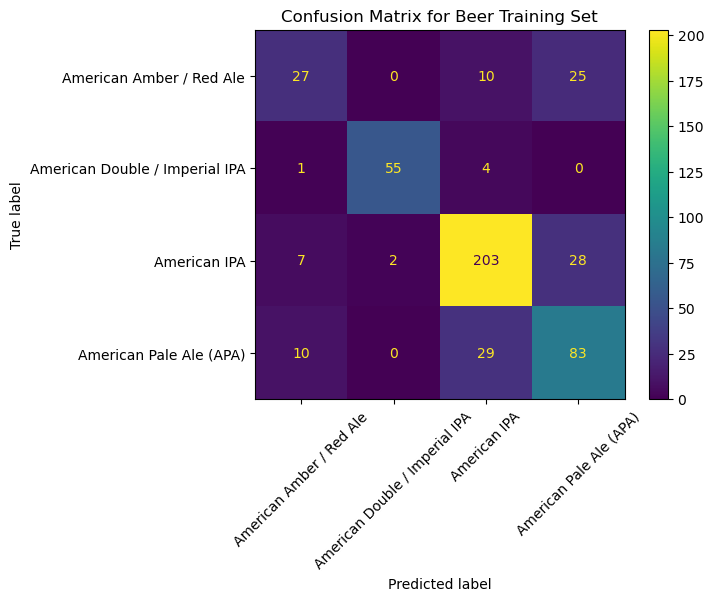

In [12]:
conf_mat_train = confusion_matrix(beer_train_Y, beer_predicted_train_Y, sample_weight=None)

# Visualize the confusion matrix:
class_names = np.unique(np.concatenate((beer_train_Y, beer_predicted_train_Y)))
ConfusionMatrixDisplay(conf_mat_train, display_labels=class_names).plot()
plt.xticks(rotation=45)
plt.title("Confusion Matrix for Beer Training Set")
plt.show()

Plot the confusion matrix:

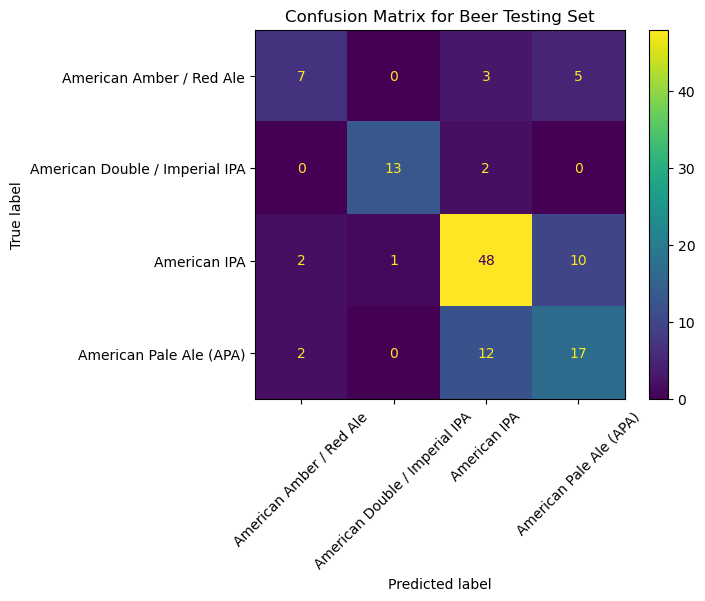

In [13]:
conf_mat_test = confusion_matrix(beer_test_Y, beer_predicted_test_Y, labels=None, sample_weight=None)

# Visualize the confusion matrix:
ConfusionMatrixDisplay(conf_mat_test, display_labels=class_names).plot()
plt.xticks(rotation=45)
plt.title("Confusion Matrix for Beer Testing Set")
plt.show()

### GridsearchCV

To tune the SVM's regularization parameter \( C \), we'll use cross-validation. 

- **Large \( C \)** → smaller margin, fewer training errors allowed  
- **Small \( C \)** → wider margin, more training errors tolerated

We'll use `GridSearchCV` to find the best \( C \) from a range of values.

Create a list called `c_values` with **10 values** between \( 10^{-4} \) and \( 10^2 \) using `np.logspace()`:

```python
import numpy as np
c_values = np.logspace(-4, 2, 10)

In [14]:
c_values = np.logspace(-4, 2, 10)

Then, we'll set up the cross-validation with GridSearchCV.

In [15]:
param_grid = {'svm__C': c_values}

We will then instantiate a GridSearchCV search by passing in the following arguments:
- The pipeline is your `beer_clf` classifier
- The param_grid is the `param_grid` we created above
- The number of folds we want is `cv=10`

Note: The `cv` parameter stands for **cross-validation**. It determines how the training data is split during the parameter tuning process.
- If you set `cv=10`, the training data is divided into **10 equal parts (folds)**.
- For each value of \( C \), the model is:
  - Trained on 9 of the folds
  - Validated on the remaining 1 fold
- This is repeated 10 times so each fold serves as the validation set once.
- The **average validation score** is used to evaluate that setting of \( C \).
- This is also known as K-fold cross validation.

We will store this search in a variable called `best_model`. 

In [16]:
best_model = GridSearchCV(beer_clf, param_grid, cv=10)

Then we'll fit our model and see what's the best C value:

In [17]:
best_model.fit(beer_train_X, beer_train_Y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02])})

In [18]:
print("Best C:", best_model.best_params_['svm__C'])

Best C: 1.0


Let's take a look at the results:

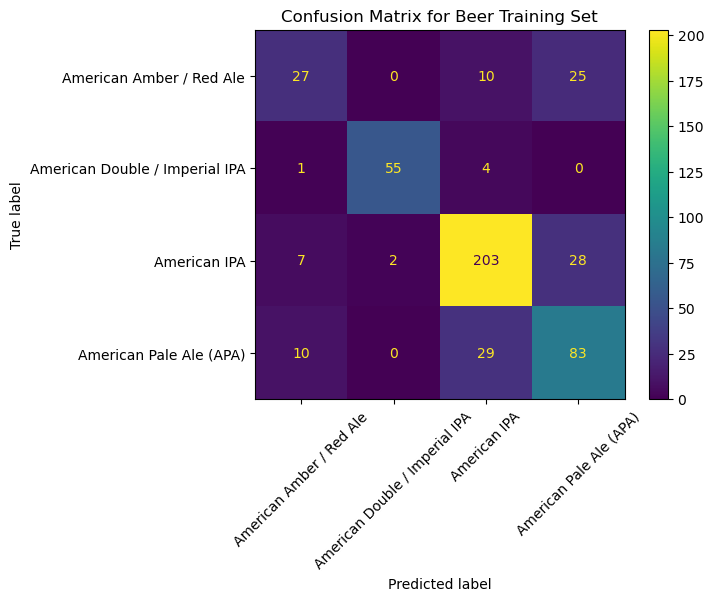

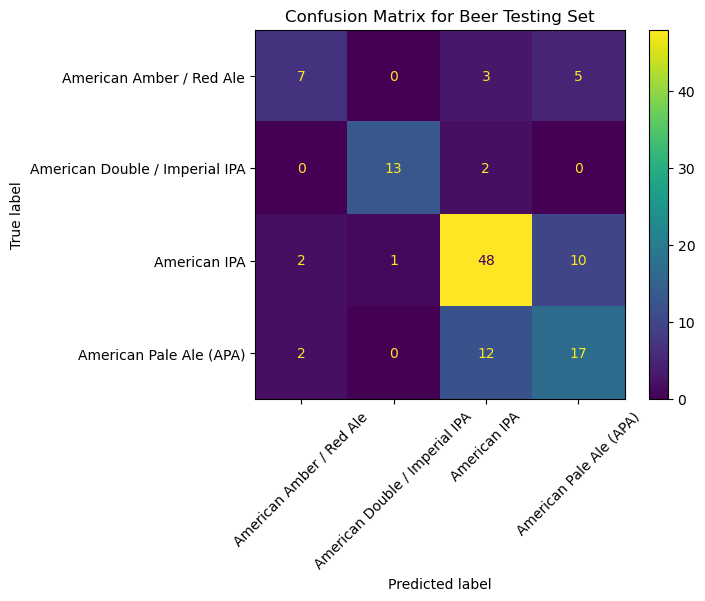

                                precision    recall  f1-score   support

      American Amber / Red Ale       0.64      0.47      0.54        15
American Double / Imperial IPA       0.93      0.87      0.90        15
                  American IPA       0.74      0.79      0.76        61
       American Pale Ale (APA)       0.53      0.55      0.54        31

                      accuracy                           0.70       122
                     macro avg       0.71      0.67      0.68       122
                  weighted avg       0.70      0.70      0.69       122



In [19]:
beer_predicted_train_Y_C = best_model.predict(beer_train_X)
beer_predicted_test_Y_C = best_model.predict(beer_test_X)

best_c_conf_mat_train = confusion_matrix(beer_train_Y, beer_predicted_train_Y_C, sample_weight=None)
ConfusionMatrixDisplay(best_c_conf_mat_train, display_labels=class_names).plot()
plt.xticks(rotation=45)
plt.title("Confusion Matrix for Beer Training Set")
plt.show()

best_c_conf_mat_test = confusion_matrix(beer_test_Y, beer_predicted_test_Y_C, labels=None, sample_weight=None)
ConfusionMatrixDisplay(best_c_conf_mat_test, display_labels=class_names).plot()
plt.xticks(rotation=45)
plt.title("Confusion Matrix for Beer Testing Set")
plt.show()

print( classification_report(beer_test_Y, beer_predicted_test_Y_C) )